### In-vitro data

In [2]:
from pathlib import Path
import spikeinterface.full as si

%matplotlib widget

In [37]:
base_data_folder = Path("/project/dlb/Dataset/SpikeImterface")
working_folder = Path("/localscratch")
base_data_folder = Path('/home/samuel/DataSpikeSorting/data_milan_2025/')
working_folder = Path("/home/samuel/DataSpikeSorting/data_milan_2025/")


recording_stem = "human_ngn2_100K_c_55D"
recording_name = f"{recording_stem}.brw"

results_folder = working_folder / recording_stem

In [38]:
recording = si.read_biocam(base_data_folder / recording_name)

In [39]:
recording = recording.remove_channels(recording.channel_ids[:1])
recording

ChannelSliceRecording: 4095 channels - 10103.075195 Hz - 1 segments - 1,211,049 samples 
                       119.87s (2.00 minutes) - uint16 dtype - 9.24 GiB

In [5]:
recording

BiocamRecordingExtractor: 4096 channels - 10103.075195 Hz - 1 segments - 1,211,049 samples 
                          119.87s (2.00 minutes) - uint16 dtype - 9.24 GiB
  file_path: /home/samuel/DataSpikeSorting/data_milan_2025/human_ngn2_100K_c_55D.brw

In [6]:
recording = si.unsigned_to_signed(recording, bit_depth=12)

In [7]:
recording

UnsignedToSignedRecording: 4096 channels - 10103.075195 Hz - 1 segments - 1,211,049 samples 
                           119.87s (2.00 minutes) - int16 dtype - 9.24 GiB

In [8]:
recording_processed = si.bandpass_filter(recording, freq_max=5000)
recording_processed = si.common_reference(recording_processed)

In [9]:
from spikeinterface.sortingcomponents.peak_detection import detect_peaks
from spikeinterface.sortingcomponents.peak_localization import localize_peaks

In [10]:
si.set_global_job_kwargs(n_jobs=-1, chunk_duration="0.5s")

In [ ]:
# noise_levels =si?.

In [ ]:
peaks = detect_peaks(recording_processed,
                     method="locally_exlussive",
        detect_threshold=6.,
        exclude_sweep_ms=0.1,
        radius_um=75.,
)

noise_level (workers: 12 processes):   0%|          | 0/20 [00:00<?, ?it/s]

detect peaks using locally_exclusive (workers: 12 processes):   0%|          | 0/240 [00:00<?, ?it/s]

In [18]:
import matplotlib.pyplot as plt

(array([4.0000e+00, 2.9000e+01, 7.0000e+00, 0.0000e+00, 1.0000e+00,
        2.5700e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 2.9000e+01,
        0.0000e+00, 8.0000e+00, 0.0000e+00, 2.5700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

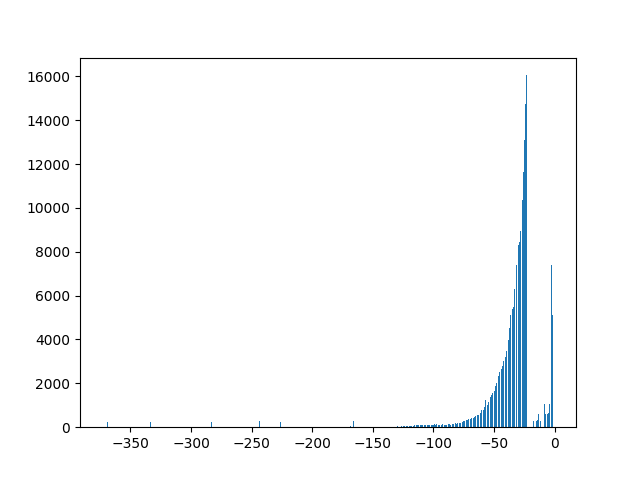

In [21]:
fig, ax = plt.subplots()
ax.hist(peaks['amplitude'], bins=500)

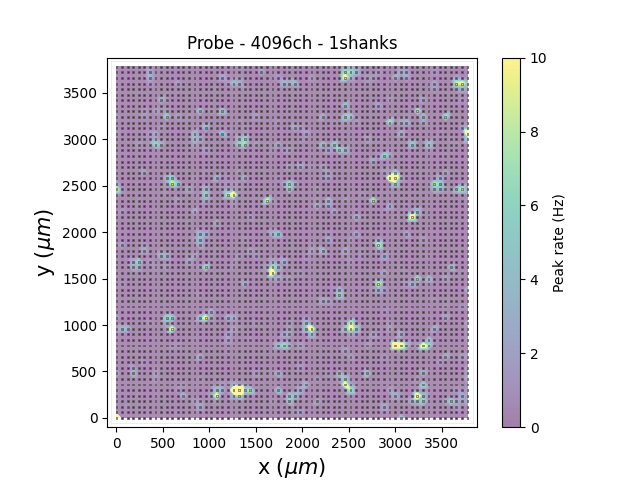

In [22]:
si.plot_peak_activity(recording, peaks, color_range=[0, 10])

In [24]:
sorting =si.NumpySorting.from_peaks(peaks, recording.sampling_frequency, recording.channel_ids)
sorting

NumpySorting: 4096 units - 1 segments - 10.1kHz

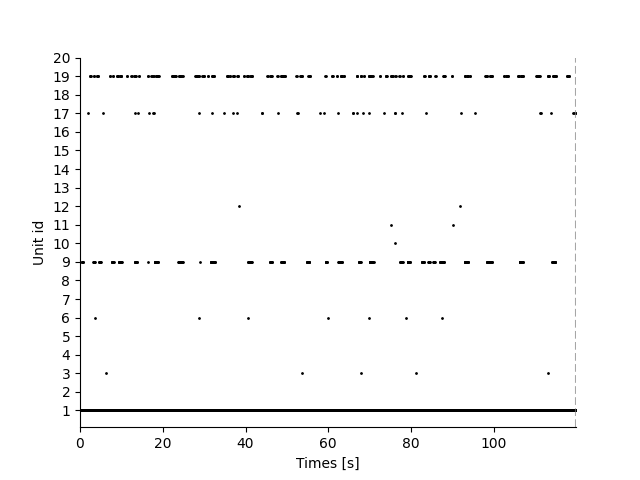

In [26]:
si.plot_rasters(sorting, unit_ids=sorting.unit_ids[:20])

In [ ]:
sorting_HS = si.run_sorter(sorter_name="herdingspikes", recording=recording_processed, 
                           folder=working_folder / recording_name / "sorter_HS",
                           verbose=True, remove_existing_folder=True)

In [27]:
import numpy as np

In [31]:
active_chan, speak_count = np.unique(peaks['channel_index'],return_counts=True)

In [ ]:
active_chan, speak_count

(array([   0,    2,    5, ..., 4091, 4092, 4093]),
 array([37510,     5,     7, ...,   158,   560,     1]))

In [33]:
very_active_channel = active_chan[speak_count>50]
very_active_channel

va_chan_ids = recording.channel_ids[very_active_channel]
va_chan_ids

array(['1', '9', '19', '42', '43', '52', '55', '81', '89', '96', '102',
       '106', '131', '145', '201', '202', '220', '221', '261', '284',
       '285', '306', '331', '351', '352', '365', '371', '375', '376',
       '402', '413', '434', '435', '436', '445', '446', '447', '456',
       '457', '476', '498', '499', '500', '504', '542', '543', '562',
       '565', '568', '570', '593', '594', '595', '604', '606', '617',
       '619', '620', '631', '632', '634', '654', '657', '658', '659',
       '683', '684', '706', '710', '718', '744', '747', '759', '765',
       '773', '775', '861', '862', '874', '887', '900', '926', '929',
       '934', '940', '946', '947', '948', '963', '964', '968', '972',
       '979', '983', '988', '992', '993', '994', '1011', '1016', '1043',
       '1052', '1058', '1064', '1065', '1066', '1069', '1073', '1077',
       '1093', '1107', '1108', '1144', '1156', '1157', '1158', '1188',
       '1196', '1212', '1222', '1223', '1258', '1259', '1268', '1272',
       '1278

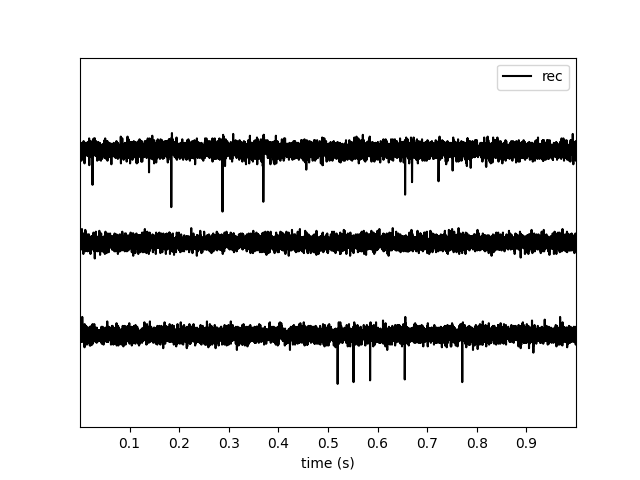

In [36]:
si.plot_traces(recording, channel_ids=va_chan_ids[1:4])

In [ ]:
sorting_HS

In [ ]:
analyzer = si.create_sorting_analyzer(sorting_HS, recording_processed)
extension_list = ["random_spikes", "templates", "unit_locations", "correlograms", "template_similarity", "spike_amplitudes"]
analyzer.compute(extension_list)

In [ ]:
si.plot_unit_templates(analyzer, backend="ipywidgets")

In [ ]:
si.plot_rasters(analyzer)

In [ ]:
potential_merges = si.compute_merge_unit_groups(analyzer, preset="x_contaminations")

In [ ]:
print(len(potential_merges))

In [ ]:
si.plot_potential_merges(analyzer, potential_merges, backend="ipywidgets")